# Chapter 8 of Partial Differential Equations: An Introduction by Walter A. Strauss

This notebook attempts to recreate the methods and examples of *Chapter 8, Computation of Solutions* from the book *Partial Differential Equations: An Introduction* by Walter A. Strauss.

The general code for a system is available in the folder `./strauss`.

In [1]:
import strauss
import numpy as np

### Example 8.1.1

This first example shows the issues with a poor assumption of time step. We take the example of diffusion:

$$u_t = u_{xx}$$

with the simple step function $\phi = I_{(3,4]}$ (where $I$ is the indicator function) as our initial condition.This is approximated over 10 $x$-steps of size $\Delta x = 0.005$ each, and $\Delta t$ is chosen to be $(\Delta x)^2$.

This produces an awful oscillatory approximation (by the maximum principle the true solution should be between 0 and 1, but here it is growing past 19!). The original example did not discuss boundary conditions, but they're not relevant to what the example is demonstrating so I chose Dirichlet boundary conditions of 0 on both ends.

In [9]:
ex_811_phi = lambda x: 1 if x==0.020 else 0
ex_811_system = strauss.Diffusion(ex_811_phi, 10, 0.005, 0.005**2)
ex_811_system.add_Dirichlet_BCs((0 ,0))

ex_811_system.print_state(0)
ex_811_system.run(5, print_state=True)

t=0 [0 0 0 0 1 0 0 0 0 0]
t=1 [ 0.  0.  0.  1. -1.  1.  0.  0.  0.  0.]
t=2 [ 0.  0.  1. -2.  3. -2.  1.  0.  0.  0.]
t=3 [ 0.  1. -3.  6. -7.  6. -3.  1.  0.  0.]
t=4 [  0.  -4.  10. -16.  19. -16.  10.  -4.   1.   0.]


### Example 8.2.1
In this section, we solve our problem; the size of the $t$-mesh $\Delta t$ relative to the size of $\Delta x$. In particular, we create a variable

$$s = \frac{\Delta t}{(\Delta x)^2}$$

and instead of defining $\Delta x$ and $\Delta t$, we define $\Delta x$ and $s$. We find $s$ lies at the basis of a "stability criterion" for convergence of our numerical method.

Our example system is the following:

$$
u_t = u_{xx}\\
u = 0\text{ at }x \in {0, \pi}\\
u(x, 0) = \phi(x) = \begin{cases}
                    x & x \in (0, \frac{\pi}{2})\\
                    \pi - x & (\frac{\pi}{2}, \pi)
                    \end{cases}
$$

We find that the primary criterion for stability is whether $s$ is greater or smaller than $1/2$.

In [2]:
ex_821_x_step = np.pi/20
ex_821_t_step = lambda s: s * ex_821_x_step**2

ex_821_phi = lambda x: x if x < np.pi/2 else (np.pi - x)

ex_821_stable_system = strauss.Diffusion(ex_821_phi, 20, ex_821_x_step, ex_821_t_step(5/11))
ex_821_unstable_system = strauss.Diffusion(ex_821_phi, 20, ex_821_x_step, ex_821_t_step(5/9))
ex_821_stable_system.add_Dirichlet_BCs((0 ,0))
ex_821_unstable_system.add_Dirichlet_BCs((0, 0))

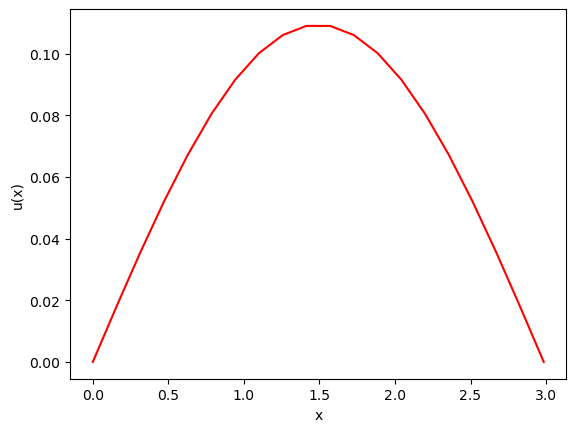

In [3]:
ex_821_stable_system.run(200)
ex_821_stable_system.graph()

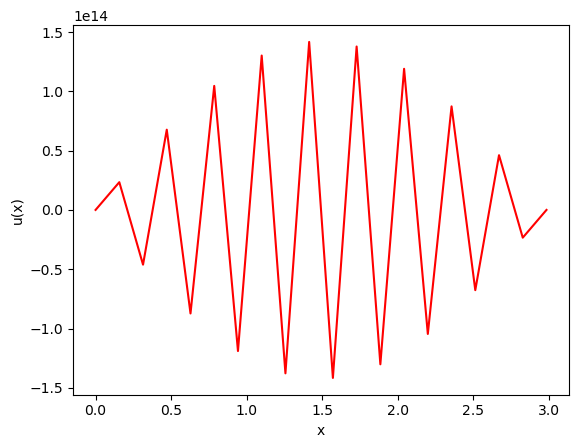

In [7]:
ex_821_unstable_system.run(200)
ex_821_unstable_system.graph()

We can also animate the two system simulations; note how you can almost 'see' the errors building up in the unstable simulation!

In [4]:
from IPython import display

anim = ex_821_stable_system.animate(200)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)

In [8]:
anim = ex_821_unstable_system.animate(20)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)